Our sensorial environment contains multiple regularities which our brain uses to optimize its representation of the world: objects fall most of the time downwards, the nose is usually in the middle below the eyes, the *sky is blue*... Concerning this last point, I wish here to illustrate the physical origins of this phenomenon and in particular the range of colors that you may observe in the sky.

<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
from pylab import rcParams
# print(rcParams)
fontsize = 20
rcParams["font.size"] = fontsize
rcParams["legend.fontsize"] = fontsize
rcParams["axes.labelsize"] = fontsize
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 15
figsize = (fig_width, fig_width/phi)
# see https://laurentperrinet.github.io/sciblog/posts/2020-08-09-nesting-jupyter-runs.html
#%run -n 2020-08-09-nesting-jupyter-runs.ipynb 
#verb = do_verb()
#verb =  (__name__ == "__main__")
def has_parent():
    """
    https://stackoverflow.com/questions/48067529/ipython-run-magic-n-switch-not-working
    
    Return True if this notebook is being run by calling
    %run in another notebook, False otherwise.
    """
    try:
        __file__
        # __file__ has been defined, so this notebook is 
        # being run in a parent notebook
        return True

    except NameError:
        # __file__ has not been defined, so this notebook is 
        # not being run in a parent notebook
        return False
def do_verb():
    return not has_parent()

verb = do_verb()
if verb : print('__name__=', __name__, '\nAm I a running this notebook directly? ', verb)

__name__= __main__ 
Am I a running this notebook directly?  True


## The colors in the sky

Intuitively it goes like this: the sun emits light, it travels space, meets other particles on the way until it hits your retina by entering the eye. This generates electro-chemical reactions on the photo-receptors, and in the particular case that interests us, the color-sensitive cones which will give ---by way of the relative balance of their responses--- the perceived color.

Going the other way around, perceived colors are fully characterized by the three cone types L, M and S which each have given tunings for different light wavelengths. To know about the colors in the sky, we should first get the spectrum (range of wavelengths) emitted by the sun and as they are filtered by the sky.

## The spectrum the sky

Let's thus begin by the sun. Given its temperature, it emits light according to a [blackboby radiation](https://en.wikipedia.org/wiki/Black-body_radiation) at 5800K. It is peaking in the range of [visible light](https://en.wikipedia.org/wiki/Visible_spectrum) (that is for wavelengths $\lambda$ between $400~nm$ and $800~nm$), toward green yellow colors.
This "smooth" spectrum contains some bands of absorption, but these are mostly outside the range of visible light, so we can discard them.

We can make a [plot of spectrum](https://stackoverflow.com/questions/22417484/plancks-formula-for-blackbody-spectrum):

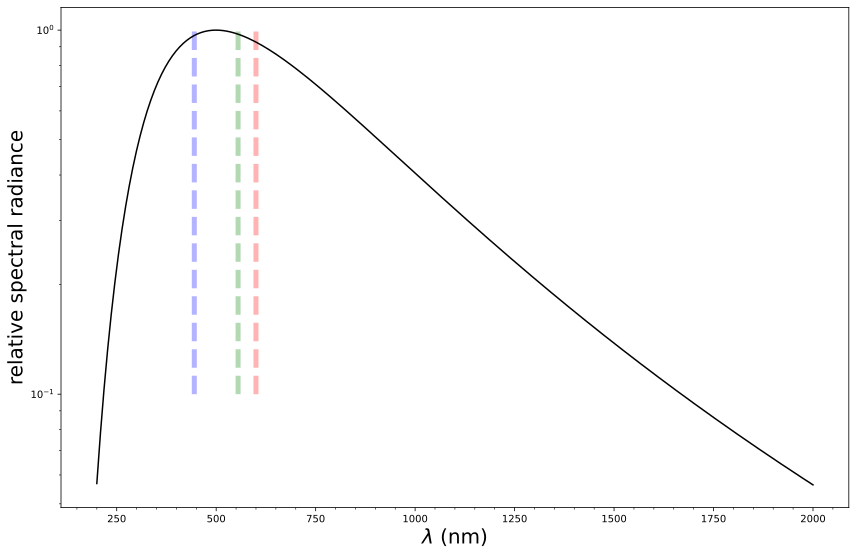

In [2]:
# borrowed from https://github.com/gummiks/gummiks.github.io/blob/master/scripts/astro/planck.py

def planck(wav, T):
    import scipy.constants as const
    c = const.c # c = 3.0e+8
    h = const.h # h = 6.626e-34
    k = const.k # k = 1.38e-23
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a / ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

if verb:
    wavelengths = np.linspace(200e-9, 2000e-9, 200) 
    intensity5800 = planck(wavelengths, 5800.)
    intensity5800 /= intensity5800.max()

    fig, ax = plt.subplots(figsize=figsize)
    # borrowed from https://github.com/gummiks/gummiks.github.io/blob/master/scripts/astro/planck.py
    adjustprops = dict(left=0.19,bottom=0.15,right=0.92,top=0.9,wspace=0.,hspace=0.2)
    fig.subplots_adjust(**adjustprops)
    ax.minorticks_on()
    ax.plot(wavelengths*1e9, intensity5800, 'k-') 
    opts = dict(ls='--', lw=5, alpha=.3)
    ax.vlines(445, .1, 1, colors='b', **opts)
    ax.vlines(555, .1, 1, colors='g', **opts)
    ax.vlines(600, .1, 1, colors='r', **opts)

    ax.set_xlabel(r'$\lambda$ (nm)')
    ax.set_ylabel('relative spectral radiance')
    #ax.set_ylim(0)
    ax.set_yscale('log')
    plt.show()

This gives the full spectrum of the sun from space, as would be seen from the ISS. The vertical dashed lines give reference wavelengths for blue, green and red.

Then, light from the sun meets the atmosphere. Due to the interactions with air particles, light is scattered (for a full reference see [[Zagury, 2012](https://file.scirp.org/pdf/ACS20120400011_46715429.pdf)]), as is well described by a simple [Rayleigh and Mie scattering formula](https://physics.stackexchange.com/questions/432874/simple-computation-of-the-spectrum-of-the-blue-sky):

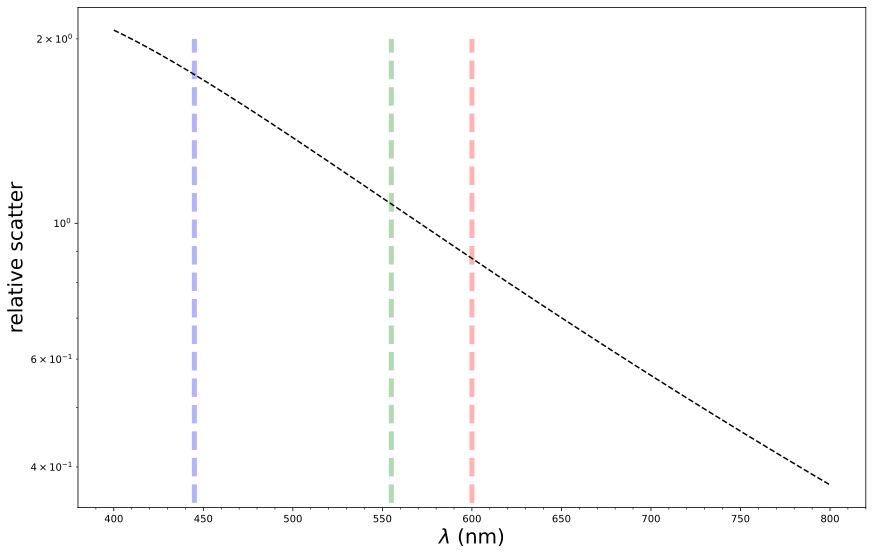

In [3]:
def scattering(wav, a=0.005, p=1.3, b=0.45):
    """
    b is  proportionate  to  the  column  density  of  aerosols  
    along  the  path  of  sunlight,  from  outside  the  atmosphere 
    to  the  point  of  observation
    
    N_O3  is  the  ozone  column  density  along  the  path  of  sunlight,  
    sigma_O3 is  the  wavelength dependent ozone absorption cross-section.
    
    """
    # converting wav in µm:
    intensity = np.exp(-a/((wav/1e-6)**4)) # Rayleigh extinction by nitrogen
    intensity *= (wav/1e-6)**-4
    intensity *= np.exp(-b/((wav/1e-6)**p)) # Aerosols
    return intensity

if verb:
    wavelengths = np.linspace(400e-9, 800e-9, 200) 
    absorption = scattering(wavelengths)


    fig, ax = plt.subplots(figsize=figsize)
    # borrowed from https://github.com/gummiks/gummiks.github.io/blob/master/scripts/astro/planck.py
    fig.subplots_adjust(**adjustprops)
    ax.minorticks_on()
    ax.plot(wavelengths*1e9, absorption / absorption.mean(), 'k--') 
    opts = dict(ls='--', lw=5, alpha=.3)
    ax.vlines(445, 0, 2, colors='b', **opts)
    ax.vlines(555, 0, 2, colors='g', **opts)
    ax.vlines(600, 0, 2, colors='r', **opts)
    ax.set_xlabel(r'$\lambda$ (nm)')
    ax.set_ylabel('relative scatter')
    #ax.set_ylim(0)
    ax.set_yscale('log')
    plt.show()



Combined, this gives the spectrum of a blue sky in the range of visible wavelengths:

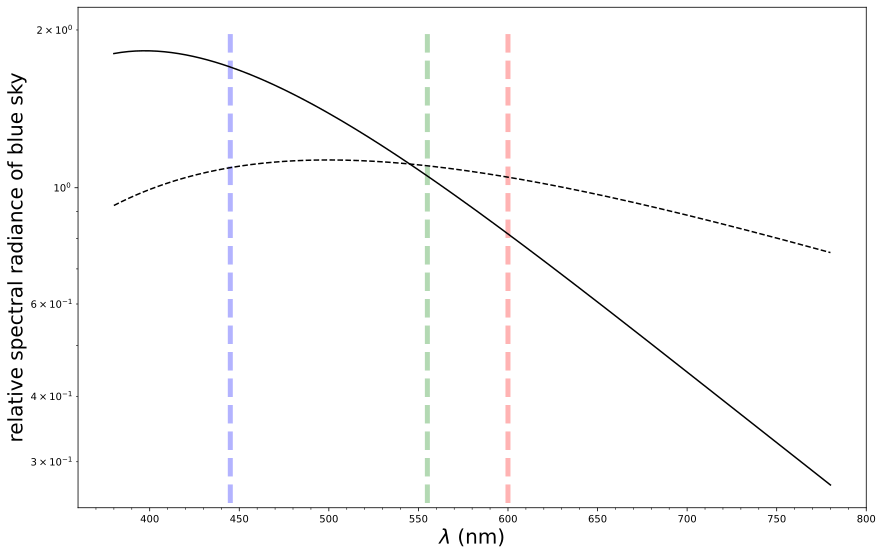

In [4]:
if verb:
    wavelengths = np.linspace(380e-9, 780e-9, 200) 
    intensity5800 = planck(wavelengths, T=5800.)
    absorption = scattering(wavelengths)
    intensity = intensity5800 * absorption

    fig, ax = plt.subplots(figsize=figsize)
    fig.subplots_adjust(**adjustprops)
    ax.minorticks_on()
    ax.plot(wavelengths*1e9, intensity5800 / intensity5800.mean(), 'k--')
    ax.plot(wavelengths*1e9, intensity / intensity.mean(), 'k-')
    ax.vlines(445, 0, 2, colors='b', **opts)
    ax.vlines(555, 0, 2, colors='g', **opts)
    ax.vlines(600, 0, 2, colors='r', **opts)
    ax.set_xlabel(r'$\lambda$ (nm)')
    ax.set_ylabel('relative spectral radiance of blue sky')
    #ax.set_ylim(0)
    ax.set_yscale('log')
    plt.show()

##  Converting a spectrum to a colour

Knowing this spectrum, how do we convert that into a color on the screen?

Colors are represented on computer screens by (R, G, B) values and I will follow this [blog post](https://scipython.com/blog/converting-a-spectrum-to-a-colour/). Let's first load the file describe the relative sensitivity of cones to the light spectrum which gives the CIE colour matching function for 380 - 780 nm in 5 nm intervals:

In [5]:
CMF_str = """380 0.0014 0.0000 0.0065
385 0.0022 0.0001 0.0105
390 0.0042 0.0001 0.0201
395 0.0076 0.0002 0.0362
400 0.0143 0.0004 0.0679
405 0.0232 0.0006 0.1102
410 0.0435 0.0012 0.2074
415 0.0776 0.0022 0.3713
420 0.1344 0.0040 0.6456
425 0.2148 0.0073 1.0391
430 0.2839 0.0116 1.3856
435 0.3285 0.0168 1.6230
440 0.3483 0.0230 1.7471
445 0.3481 0.0298 1.7826
450 0.3362 0.0380 1.7721
455 0.3187 0.0480 1.7441
460 0.2908 0.0600 1.6692
465 0.2511 0.0739 1.5281
470 0.1954 0.0910 1.2876
475 0.1421 0.1126 1.0419
480 0.0956 0.1390 0.8130
485 0.0580 0.1693 0.6162
490 0.0320 0.2080 0.4652
495 0.0147 0.2586 0.3533
500 0.0049 0.3230 0.2720
505 0.0024 0.4073 0.2123
510 0.0093 0.5030 0.1582
515 0.0291 0.6082 0.1117
520 0.0633 0.7100 0.0782
525 0.1096 0.7932 0.0573
530 0.1655 0.8620 0.0422
535 0.2257 0.9149 0.0298
540 0.2904 0.9540 0.0203
545 0.3597 0.9803 0.0134
550 0.4334 0.9950 0.0087
555 0.5121 1.0000 0.0057
560 0.5945 0.9950 0.0039
565 0.6784 0.9786 0.0027
570 0.7621 0.9520 0.0021
575 0.8425 0.9154 0.0018
580 0.9163 0.8700 0.0017
585 0.9786 0.8163 0.0014
590 1.0263 0.7570 0.0011
595 1.0567 0.6949 0.0010
600 1.0622 0.6310 0.0008
605 1.0456 0.5668 0.0006
610 1.0026 0.5030 0.0003
615 0.9384 0.4412 0.0002
620 0.8544 0.3810 0.0002
625 0.7514 0.3210 0.0001
630 0.6424 0.2650 0.0000
635 0.5419 0.2170 0.0000
640 0.4479 0.1750 0.0000
645 0.3608 0.1382 0.0000
650 0.2835 0.1070 0.0000
655 0.2187 0.0816 0.0000
660 0.1649 0.0610 0.0000
665 0.1212 0.0446 0.0000
670 0.0874 0.0320 0.0000
675 0.0636 0.0232 0.0000
680 0.0468 0.0170 0.0000
685 0.0329 0.0119 0.0000
690 0.0227 0.0082 0.0000
695 0.0158 0.0057 0.0000
700 0.0114 0.0041 0.0000
705 0.0081 0.0029 0.0000
710 0.0058 0.0021 0.0000
715 0.0041 0.0015 0.0000
720 0.0029 0.0010 0.0000
725 0.0020 0.0007 0.0000
730 0.0014 0.0005 0.0000
735 0.0010 0.0004 0.0000
740 0.0007 0.0002 0.0000
745 0.0005 0.0002 0.0000
750 0.0003 0.0001 0.0000
755 0.0002 0.0001 0.0000
760 0.0002 0.0001 0.0000
765 0.0001 0.0000 0.0000
770 0.0001 0.0000 0.0000
775 0.0001 0.0000 0.0000
780 0.0000 0.0000 0.0000"""
CMF = np.zeros((len(CMF_str.split('\n')), 4))
for i, line in enumerate(CMF_str.split('\n')): 
    CMF[i, :] = np.fromstring(line, sep=' ')

This is plotted as the different sensitivities to a novel color space called the [CIE 193 " XYZ" color space](https://en.wikipedia.org/wiki/CIE_1931_color_space) :

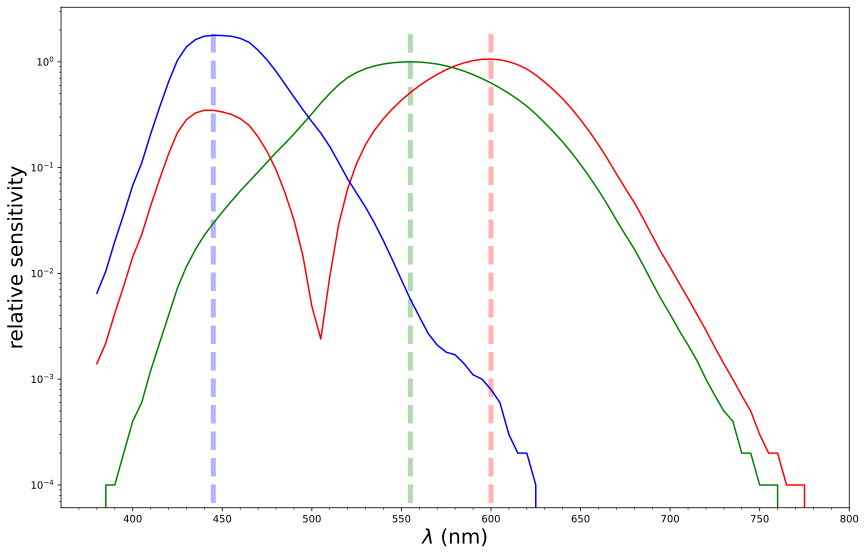

In [6]:
if verb:
    fig, ax = plt.subplots(figsize=figsize)
    wavelengths = CMF[:, 0]*1e-9
    fig.subplots_adjust(**adjustprops)
    ax.minorticks_on()
    for i_color, color in enumerate(['r', 'g', 'b']):
        ax.plot(wavelengths*1e9, CMF[:, i_color+1], color=color) 
    ax.vlines(445, 0, 2, colors='b', **opts)
    ax.vlines(555, 0, 2, colors='g', **opts)
    ax.vlines(600, 0, 2, colors='r', **opts)
    ax.set_xlabel(r'$\lambda$ (nm)')
    ax.set_ylabel('relative sensitivity')
    #ax.set_ylim(0)
    ax.set_yscale('log')
    plt.show()

Such that we may obtain a RGB value fro a given wavelength, adapting code from https://scipython.com/blog/converting-a-spectrum-to-a-colour/ :

In [7]:
def xyz_from_xy(x, y):
    """Return the vector (x, y, 1-x-y)."""
    return np.array((x, y, 1-x-y))

class ColourSystem:
    """A class representing a colour system.

    A colour system defined by the CIE x, y and z=1-x-y coordinates of
    its three primary illuminants and its "white point".

    TODO: Implement gamma correction

    """

    # CMF is the CIE colour matching function for 380 - 780 nm in 5 nm intervals

    def __init__(self, red, green, blue, white, CMF):
        """Initialise the ColourSystem object.

        Pass vectors (ie NumPy arrays of shape (3,)) for each of the
        red, green, blue  chromaticities and the white illuminant
        defining the colour system.

        """

        # Chromaticities
        self.red, self.green, self.blue = red, green, blue
        self.white = white
        # The chromaticity matrix (rgb -> xyz) and its inverse
        self.M = np.vstack((self.red, self.green, self.blue)).T 
        self.MI = np.linalg.inv(self.M)
        # White scaling array
        self.wscale = self.MI.dot(self.white)
        # xyz -> rgb transformation matrix
        self.T = self.MI / self.wscale[:, np.newaxis]
        self.cmf = CMF

    def xyz_to_rgb(self, xyz, out_fmt=None):
        """Transform from xyz to rgb representation of colour.

        The output rgb components are normalized on their maximum
        value. If xyz is out the rgb gamut, it is desaturated until it
        comes into gamut.

        By default, fractional rgb components are returned; if
        out_fmt='html', the HTML hex string '#rrggbb' is returned.

        """

        rgb = self.T.dot(xyz)
        # rgb = np.tensordot(xyz, self.T.T, axis=1)
        if np.any(rgb < 0):
            # We're not in the RGB gamut: approximate by desaturating
            w = - np.min(rgb)
            rgb += w
        if not np.all(rgb==0):
            # Normalize the rgb vector
            rgb /= np.max(rgb)

        return rgb

    def spec_to_xyz(self, spec):
        """Convert a spectrum to an xyz point.

        The spectrum must be on the same grid of points as the colour-matching
        function, self.cmf: 380-780 nm in 5 nm steps.

        """

        XYZ = np.sum(spec[:, np.newaxis] * self.cmf, axis=0)
        den = np.sum(XYZ)
        if den == 0.:
            return XYZ
        return XYZ / den

    def spec_to_rgb(self, spec, out_fmt=None):
        """Convert a spectrum to an rgb value."""

        xyz = self.spec_to_xyz(spec)
        return self.xyz_to_rgb(xyz, out_fmt)

# a standard white:
illuminant_D65 = xyz_from_xy(0.3127, 0.3291)
# color conversion class
cs_srgb = ColourSystem(red=xyz_from_xy(0.64, 0.33),
                       green=xyz_from_xy(0.30, 0.60),
                       blue=xyz_from_xy(0.15, 0.06),
                       white=illuminant_D65,
                       CMF=CMF[:, 1:])

## Colors of pure wavelengths

To better understand what happens, let's render the color perceived for the spectrum of "pure" wavelengths (that is, a spectrum peaked at one wavelength):

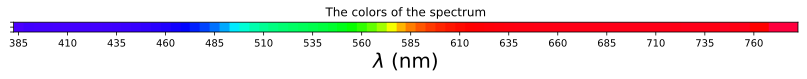

In [8]:
if verb:
    wavelengths = CMF[1:, 0]*1e-9
    N_wavelengths = len(wavelengths)
    hues = np.zeros((1, N_wavelengths, 3))
    for i_wavelengths in range(N_wavelengths):
        spec = np.zeros(N_wavelengths+1)
        spec[i_wavelengths] = 1
        hues[0, i_wavelengths, :] = cs_srgb.spec_to_rgb(spec)

    fig, ax = plt.subplots(figsize=figsize)
    fig.subplots_adjust(**adjustprops)
    #ax.pcolormesh(wavelengths[:, None], np.ones((N_wavelengths, 1)), hues) 
    ax.imshow(hues) 
    ticks = np.arange(0, N_wavelengths, 5)
    ax.set_xticks(ticks)
    ax.set_xticklabels([f'{wavelengths[i]*1e9:.0f}' for i in ticks])
    ax.set_yticklabels([])
    ax.set_xlabel(r'$\lambda$ (nm)')
    ax.set_title('The colors of the spectrum')
    plt.show()

## Getting the final color

The color of the sky is equal to XYZ [0.268375 0.283377 0.448248] , RGB [0.488779 0.672615 1.      ]


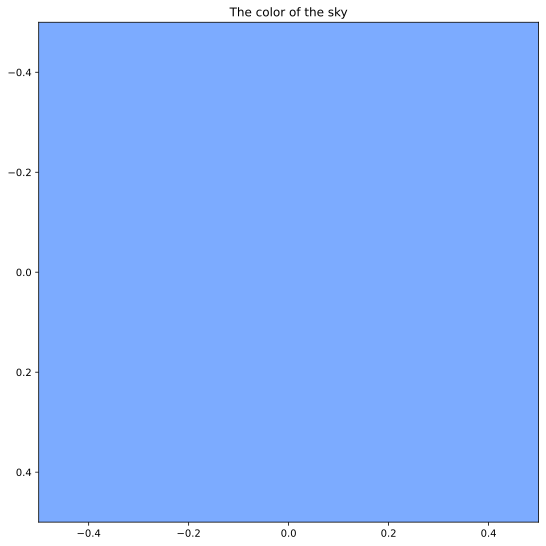

In [9]:
wavelengths = CMF[:, 0]*1e-9
intensity5800 = planck(wavelengths, 5800.)
scatter = scattering(wavelengths)
spectrum = intensity5800 * scatter
bluesky = cs_srgb.spec_to_rgb(spectrum)
if verb:
    print('The color of the sky is equal to XYZ', cs_srgb.spec_to_xyz(spectrum), ', RGB', bluesky)
    fig, ax = plt.subplots(figsize=figsize)
    fig.subplots_adjust(**adjustprops)
    ax.imshow(cs_srgb.spec_to_rgb(spectrum)[None, None, :]) 
    ax.set_title('The color of the sky')
    plt.show()

The color of the sun is equal to XYZ [0.325998 0.335354 0.338647] , RGB [1.       0.878533 0.82684 ]


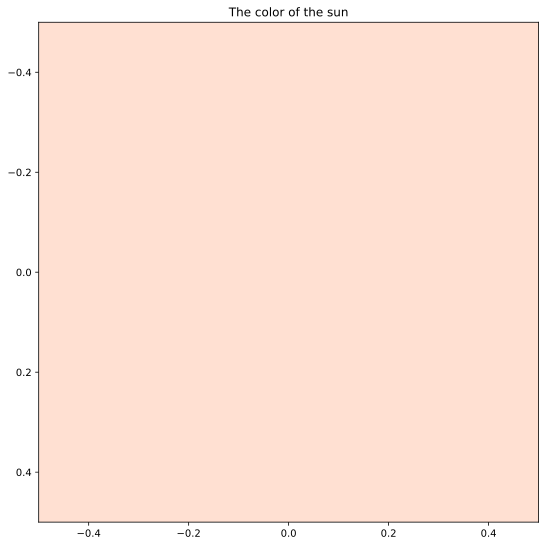

In [10]:
if verb:
    print('The color of the sun is equal to XYZ', cs_srgb.spec_to_xyz(intensity5800), ', RGB',  cs_srgb.spec_to_rgb(intensity5800))
    fig, ax = plt.subplots(figsize=figsize)
    fig.subplots_adjust(**adjustprops)
    ax.imshow(cs_srgb.spec_to_rgb(intensity5800)[None, None, :]) 
    ax.set_title('The color of the sun')
    plt.show()

So that we can compare the extra-terrestrial color of the sun vs the color of the sky:

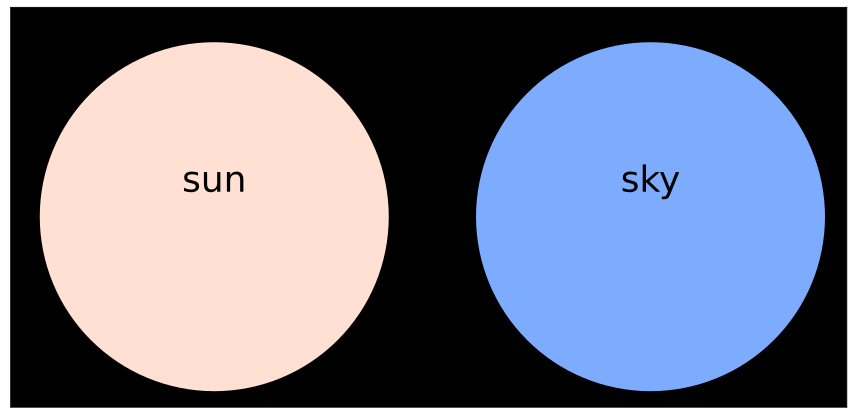

In [11]:
if verb:
    # again borrowing code from https://scipython.com/blog/converting-a-spectrum-to-a-colour/
    from matplotlib.patches import Circle

    fig, ax = plt.subplots(figsize=(fig_width, fig_width))
    for i, (label, spec) in enumerate([['sun', intensity5800], ['sky', spectrum]]):
        radius = 1.2
        html_rgb = cs_srgb.spec_to_rgb(spec, out_fmt='html')

        # Place and label a circle with the colour of a black body at temperature T
        x, y = radius*.75 + 2.5*radius*i, -radius
        circle = Circle(xy=(x, y*1.2), radius=radius, fc=html_rgb)
        ax.add_patch(circle)
        ax.annotate(label, xy=(x, y), va='center', ha='center', color='k', fontsize=36)

    # Set the limits and background colour; remove the ticks
    ax.set_xlim(-0.5, 5.25)
    ax.set_ylim(-2.75, 0.)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
    # Make sure our circles are circular!
    ax.set_aspect("equal")
    plt.show()

both may be compared with each other to give an idea of their relative colors:

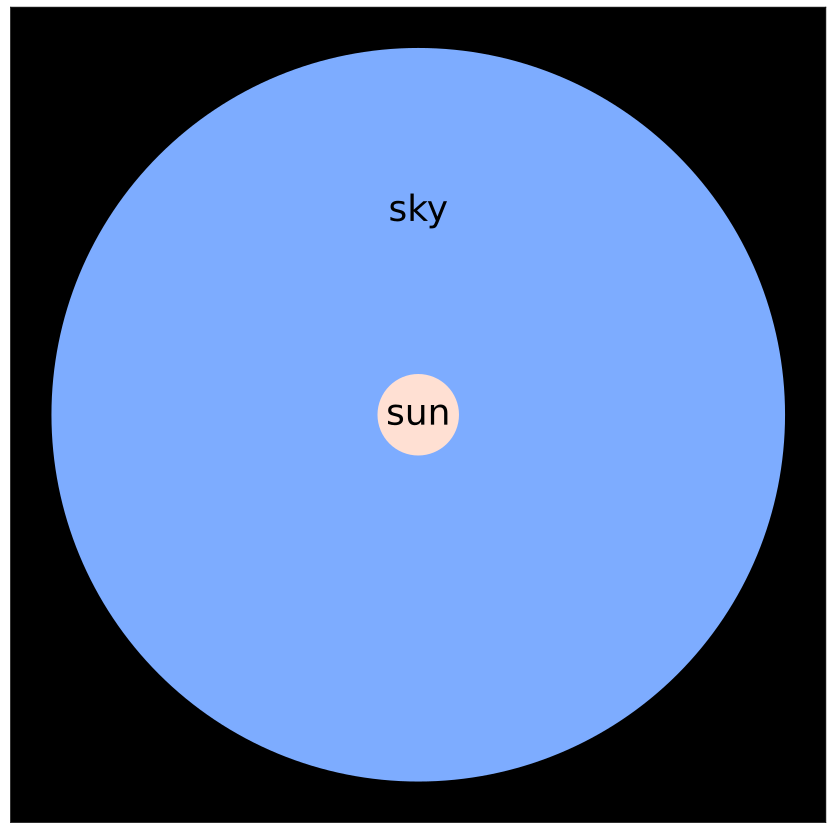

In [12]:
if verb:
    # again borrowing code from https://scipython.com/blog/converting-a-spectrum-to-a-colour/
    from matplotlib.patches import Circle

    fig, ax = plt.subplots(figsize=(fig_width, fig_width))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1.)
    for i, (label, spec, radius) in enumerate([['sky', spectrum, .9], ['sun', intensity5800, .1]]):
        html_rgb = cs_srgb.spec_to_rgb(spec, out_fmt='html')

        # Place and label a circle with the colour of a black body at temperature T
        circle = Circle(xy=(0, 0), radius=radius, fc=html_rgb)
        ax.add_patch(circle)
        ax.annotate(label, xy=(0, 1.25*(radius/2-.05)), va='center', ha='center', color='k', fontsize=36)

    # Set the limits and background colour; remove the ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
    # Make sure our circles are circular!
    ax.set_aspect("equal")
    plt.show()

## and what about sunset?

"At the other end of the visible spectrum the reason for the red color of the horizon at sunrise or sunset is still an open  question." [[Zagury, 2012](https://file.scirp.org/pdf/ACS20120400011_46715429.pdf)] - did you know that the sky can also have shades of [green](https://physics.stackexchange.com/questions/137189/why-is-the-sky-never-green-it-can-be-blue-or-orange-and-green-is-in-between/192408#192408)? Or the reason for the "[Red sky at night, sailors delight](https://physics.stackexchange.com/questions/461187/is-there-a-difference-between-the-red-sky-in-the-morning-and-in-the-evening/461225#461225)" proverb?

At sunset, light as to travel a larger path through the atmosphere, and is in particular relatively more absorbed in the [Chappuis bands](https://en.wikipedia.org/wiki/Chappuis_absorption). 

still, an approximation can be made for the effect of sunset as Rayleigh extinction

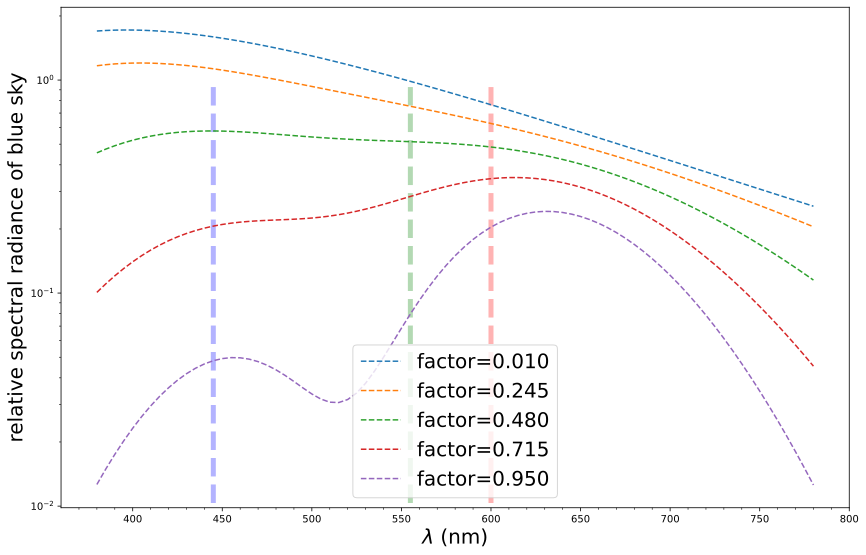

In [13]:
def chappuis(wavelengths, lambda_NO3=520e-9, B_NO3=.2, lambda_N2=603e-9, B_N2=70e-9, factor=1.):
    """
    # The absorption maximum lies around 603 nm
    # with a cross-section of 5.23 10−21 cm2
    
    N_O3  is  the  ozone  column  density  along  the  path  of  sunlight,  
    sigma_O3 is  the  wavelength dependent ozone absorption cross-section.
    
    """
    c_absorption = 1 - factor*np.exp(-.5*np.log(wavelengths/lambda_NO3)**2/B_NO3**2)
    c_absorption *= np.exp(-.5*(wavelengths-lambda_N2)**2/B_N2**2*factor**2)
    return c_absorption

if verb:

    fig, ax = plt.subplots(figsize=figsize)
    # borrowed from https://github.com/gummiks/gummiks.github.io/blob/master/scripts/astro/planck.py
    fig.subplots_adjust(**adjustprops)
    ax.minorticks_on()

    wavelengths = CMF[:, 0]*1e-9
    intensity5800 = planck(wavelengths, 5800.)
    for factor in np.linspace(0.01, 0.95, 5):
        spectrum = intensity5800 * scattering(wavelengths) * chappuis(wavelengths, factor=factor) *1e-14
        #spectrum = chappuis(wavelengths, factor=factor)
        ax.plot(wavelengths*1e9, spectrum  , ls='--', label=f'factor={factor:.3f}')

    ax.vlines(445, 0, 1, colors='b', **opts)
    ax.vlines(555, 0, 1, colors='g', **opts)
    ax.vlines(600, 0, 1, colors='r', **opts)
    ax.set_xlabel(r'$\lambda$ (nm)')
    ax.set_ylabel('relative spectral radiance of blue sky')
    #ax.set_ylim(0)
    ax.set_yscale('log')
    ax.legend(loc='best')
    plt.show()

crazy guess, but somewhat fits Figure 5 from [[Zagury, 2012](https://file.scirp.org/pdf/ACS20120400011_46715429.pdf)] to achieve some sort of [sunset](https://en.wikipedia.org/wiki/Sunset)...

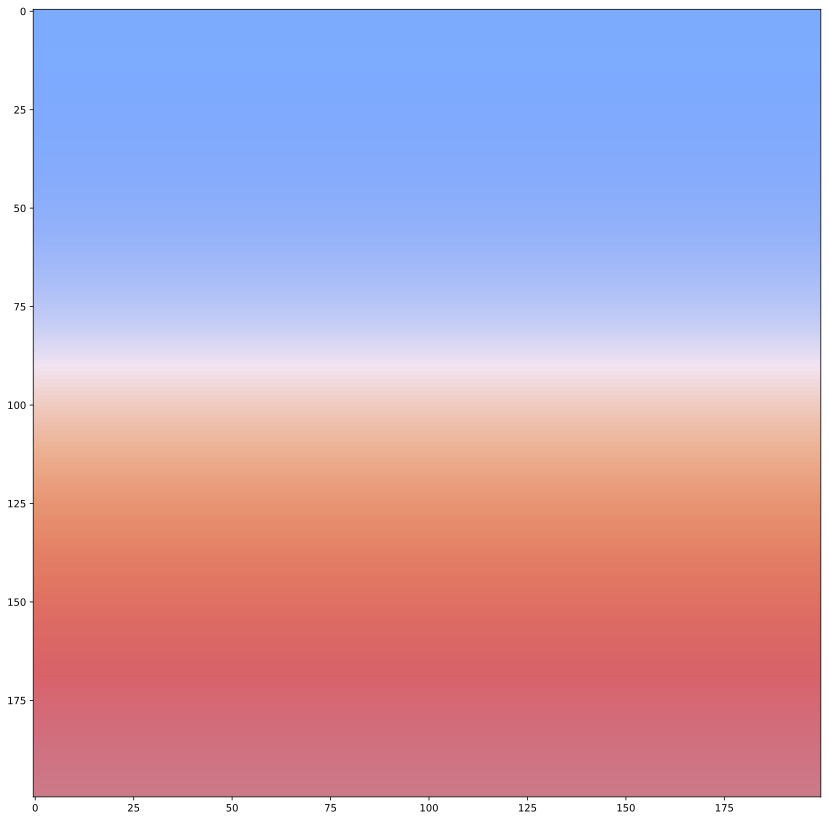

In [14]:
if verb:
    wavelengths = CMF[:, 0]*1e-9

    N_shades, N_width = 200, 200

    hues = np.zeros((N_shades, N_width, 3))
    wavelengths = CMF[:, 0]*1e-9
    intensity5800 = planck(wavelengths, 5800.)
    azimuths = np.linspace(0, 1, N_shades)
    for i_azimuth, azimuth in enumerate(azimuths):
        factor = .001 + np.sin(azimuth*np.pi/2)**2*1.1
        spectrum = intensity5800 * scattering(wavelengths) * chappuis(wavelengths, factor=factor)
        color = cs_srgb.spec_to_rgb(spectrum)
        saturation = .6 * np.cos(azimuth*np.pi/2) + .4
        color = saturation * color + (1-saturation) # saturation
        color *= .2*np.cos(azimuth*np.pi/2) + .8 # value
        hues[i_azimuth, :, :] = color[None, :]

    fig, ax = plt.subplots(figsize=(fig_width, fig_width*4))
    fig.subplots_adjust(**adjustprops)
    ax.imshow(hues) 
    plt.show()

## a final note

Found out after doing that post that this was already explored in https://github.com/ookuyan/py_sky - of course, in a better programming style :-)
But it is known that one only learns from a journey not only by reaching your goal but by enjoying the path...

* TODO : green flash and mirage  

## something "funny" to always remember

Numpy arrays passed to a function are changed, contrary to scalars:

In [15]:
if verb:
    def compute(a, b=3):
        a *= 2
        b *= a
        return a + b

    print('scalar')
    a = 2
    print('a =', a)
    c = compute(a)
    print('a =', a, ', c =', c)

    print('numpy')
    a = np.arange(0, 4) 
    print('a =', a)
    c = compute(a)
    print('a =', a, ', c =', c)

scalar
a = 2
a = 2 , c = 16
numpy
a = [0 1 2 3]
a = [0 2 4 6] , c = [ 0  8 16 24]


## some book keeping for the notebook

In [16]:
if verb:
    %load_ext watermark
    %watermark -i -h -m -v -p numpy,matplotlib,scipy,pillow,imageio  -r -g -b

2020-09-04T17:11:00+02:00

CPython 3.8.5
IPython 7.16.1

numpy 1.20.0.dev0+7d04e22
matplotlib 3.2.2
scipy 1.5.2
pillow not installed
imageio 2.9.0

compiler   : Clang 11.0.3 (clang-1103.0.32.62)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit
host name  : fortytwo
Git hash   : 0ce331221da902a99c91f8bada6a6c4908b3ebd8
Git repo   : https://github.com/laurentperrinet/sciblog.git
Git branch : master
